In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import metrics

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
df.isnull().values.any()

True

In [4]:
# - Checking to see which value is the null value. Who that person is and how removing them will affect the data set.
df[df['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
df['yearsrank'].median()

5.0

In [6]:
# - Dropping row with null value
df_new = df.dropna(axis=0, inplace=True)

In [7]:
# - Checking to confirm that the df has no null values
df.isnull().values.any()

False

### EDA

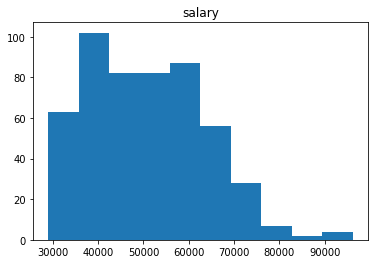

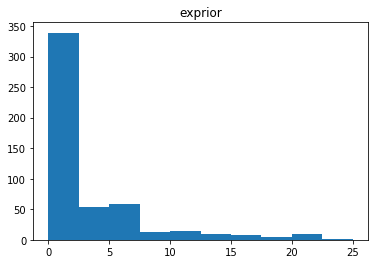

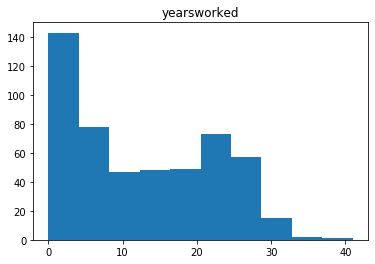

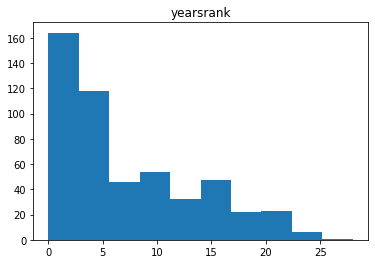

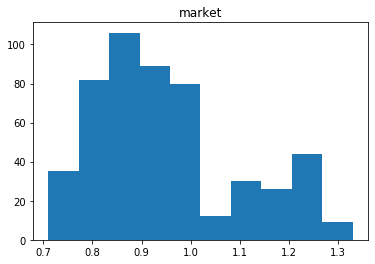

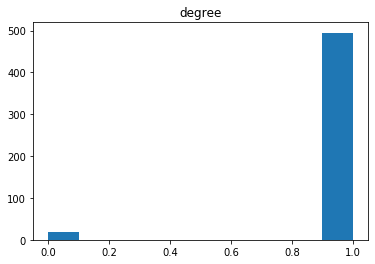

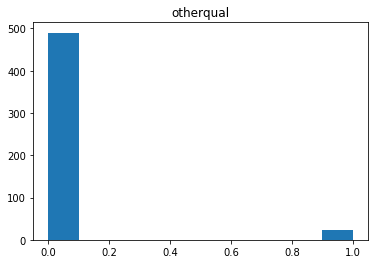

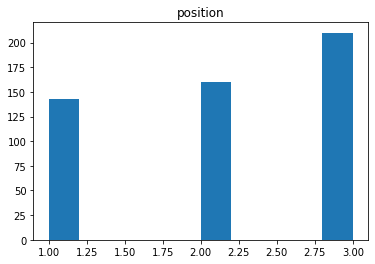

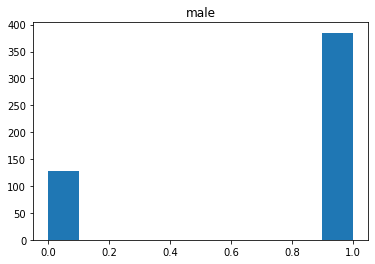

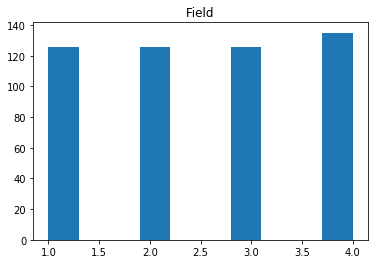

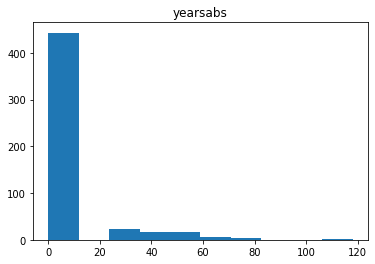

In [8]:
# plotting histogram for each column to see which columns I can use
for i in list(df.columns):
    plt.hist(df[i])
    plt.title(i)
    plt.show()

- For exprior, yearsworked, yearsrank and market the data is distributed to the right. This means that most of that data in the sample set sits in the right side. 

- From this we can interpret that: 
- most of the people in the sample set earn salaries low salaries
- most of the people in the sample set do not have much experience prior to their current careers.
- most of the people in the sample set aren't in their careers very long
- most of the people in the sample set have a market value below the median. This also means that most of the people earn a salary below the market value.

- We can also see that almost everyone has a degree. Less than 50 people don't have degrees
- Most participants do not have any other post-secondary qualification. Less than 50 people have
- Most participants are in executive positions
- Most of the participants are men
- Most of the participants are in marketing. Engineering, Finance and HR have the same amount of participants.
- Almost everyone has been absent from work 10 years or less. Very few people have surpassed that amount of time.

In [9]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


- After examining the correlation between all the columns, I can conclude that yearsworked, yearsrank and position are columns I could use to model. However, since the position column contains categorical data I cannot use it to build a model.

Text(0, 0.5, 'Salary')

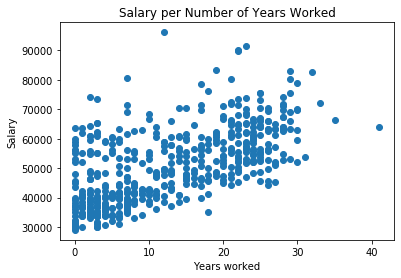

In [10]:
#plot graph to understand relationship between years worked and salary. Also looking to to see if there are any outliers
plt.scatter(df['yearsworked'],df['salary'])
plt.title('Salary per Number of Years Worked')
plt.xlabel('Years worked')
plt.ylabel('Salary')

In [11]:
pearsonr(df['yearsworked'],df['salary'])

(0.6235888657598048, 1.2873351342916404e-56)

- There is a moderate, positive correlation. The p-value is low meaning that the correlation is statistically significant.
- The data is appropriate for linear regression.

### Spliting model into training and testing set

In [12]:
x1 = df[['yearsworked']]

In [13]:
x = sm.add_constant(x1.values)

In [14]:
y = df['salary']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [16]:
#checking to see if training set has any null values
np.any(np.isnan(x_train))

False

In [17]:
#checking to see if training set has any null values
y_train.isnull().values.any()

False

### Modelling with constant

In [18]:
model = sm.OLS(y_train,x_train).fit()

In [19]:
predictions = model.predict(x_test) 

Text(0, 0.5, 'Y - Predicted')

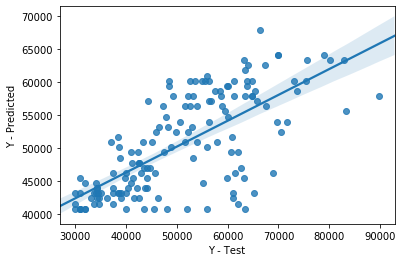

In [20]:
sns.regplot(y_test,predictions)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')

In [21]:
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     187.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           1.35e-34
Time:                        14:53:40   Log-Likelihood:                -3817.5
No. Observations:                 359   AIC:                             7639.
Df Residuals:                     357   BIC:                             7647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.082e+04    905.027     45.104      0.000     3.9e+04    4.26e+04
x1           774.7688     56.582     13.693      0.000     663.493     886.044
==============================================================================
Omnibus:                       63.183   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.136
Skew:                           1.076   Prob(JB):                     4.90e-22
Kurtosis:                       4.390   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model does not significantly predict the dependant variable as the R^2 value is 0.344, which is really low. This value is statistically significant as the p-value is 0.00.

- 34.4% of employees’ salaries is accounted for by the number of years they have worked

- The 95% confidence intervals [0.025, 0.975]  are  [663.493 - 886.044] and this is the range in which our coffecient is likely to fall.

- Holding all other features fixed, a 1 unit increase in **yearsworked** is associated with an **increase of 774.7688 **.

- Another characteristic that can influence someones salary is the years worked at current rank. 

In [22]:
model.predict(pd.DataFrame({'conts':1.0,'years':[12,80]}))

0     50117.213957
1    102801.492334
dtype: float64

- Someone with 12 years of experience will earn 50117.213957
- Someone with 80 years experience will earn 102801.492334. This value you seems okay, consedering the fact that the model has a low accuracy. Compared to the the data it is the most amount of years and the largest salary. That make's sense in terms of the model because as years increase there is a tendency for the salary to increase as well.

In [23]:
print('TESE RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model.predict(x_train))))

TESE RMSE: 9639.131250830247
TRAIN RMSE: 10045.176101008155


- The **RSME** value is really high, this tells us that it is not a good fit. There is no evidence of overfitting.

### Modelling without constant

In [24]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=101)

In [25]:
model1 = sm.OLS(y_train,x1_train).fit()

In [26]:
predictions1 = model1.predict(x1_test) 

Text(0, 0.5, 'Y - Predicted')

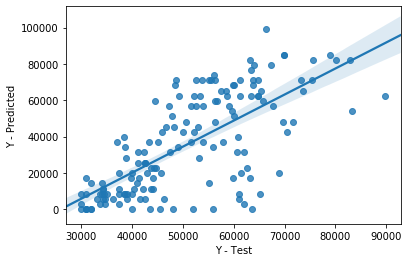

In [27]:
sns.regplot(y_test,predictions1)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')

In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.753
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              1093.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):                   7.81e-111
Time:                        14:53:40   Log-Likelihood:                         -4158.9
No. Observations:                 359   AIC:                                      8320.
Df Residuals:                     358   BIC:                                      8324.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
yearsworked  2840.0566     85.905     33.061      0.000    2671.115    3008.998
==============================================================================
Omnibus:                        5.971   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.760
Skew:                          -0.029   Prob(JB):                        0.153
Kurtosis:                       2.502   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The model does not significantly predict the dependant variable as the R^2 value is 0.753, which is really low. This value is statistically significant as the p-value is 0.00.

- 75.3% of employees’ salaries is accounted for by the number of years they have worked

- The 95% confidence intervals [0.025, 0.975]  are  [2671.115 - 3008.998] and this is the range in which our coffecient is likely to fall.

- Holding all other features fixed, a 1 unit increase in **yearsworked** is associated with an **increase of 	2840.0566 **.

- Another characteristic that can influence someones salary is the years worked at current rank. 

In [29]:
model1.predict([12,80])

array([ 34080.67884927, 227204.5256618 ])

- Someone with 12 years of experience will earn 34080.67884927
- Someone with 80 years experience will earn 227204.5256618. This value you seems okay, consedering the fact that the model has a low accuracy. Compared to the the data it is the most amount of years and the largest salary. That make's sense in terms of the model because as years increase there is a tendency for the salary to increase as well.

In [30]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))
print('TRAIN RMSE:', np.sqrt(metrics.mean_squared_error(y_train, model1.predict(x1_train))))

TEST RMSE: 25156.779555611032
TRAIN RMSE: 25998.23792521561


In conclusion, the model with the constant is better at predicting values as it has a **RSME** that is significantly smaller than when the one without a constant.